In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
df=pd.read_csv("./Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=df.drop("sales",axis=1)
Y=df["sales"]

In [10]:
train_rmse=[]
test_rmse=[]
for i in range(1,10):
    polynomial_feature=PolynomialFeatures(degree=i,include_bias=False)
    poly_model=polynomial_feature.fit_transform(X)
    X_train, X_test,y_train,y_test=train_test_split(poly_model,Y,test_size=0.30,random_state=42)
    model=LinearRegression()
    model.fit(X_train,y_train)
    prediction_test=model.predict(X_test)
    prediction_train=model.predict(X_train)
    train_rmse.append(mean_squared_error(prediction_train,y_train))
    test_rmse.append(mean_squared_error(prediction_test,y_test))    

In [11]:
train_rmse

[2.4793551789057866,
 0.35410977541934036,
 0.21984452631177434,
 0.13650731992377144,
 0.05944920562276688,
 0.03860817350119784,
 0.1803090796089726,
 0.02478555426338978,
 0.027420112138282004]

In [12]:
test_rmse

[3.7967972367152196,
 0.52319449490554,
 0.2907744915182668,
 1.6983995988223308,
 35.36094828309626,
 674.2059374978611,
 402552.87322496565,
 7277940.968782001,
 17651655427.41463]

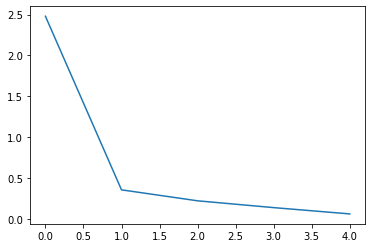

In [18]:
plt.plot(range(0,5),train_rmse[:5],label="train")


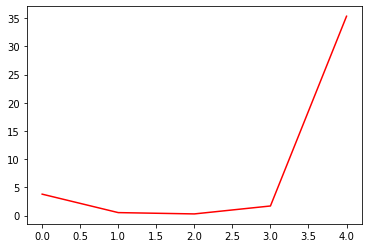

In [17]:
plt.plot(range(0,5),test_rmse[:5],label="test",color="red")

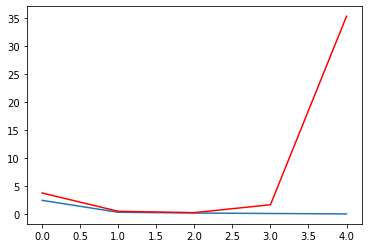

In [19]:
plt.plot(range(0,5),train_rmse[:5],label="train")
plt.plot(range(0,5),test_rmse[:5],label="test",color="red")


# Model deployement

In [28]:
polynomial_feature=PolynomialFeatures(degree=2,include_bias=False)
poly_model=polynomial_feature.fit_transform(X)
X_train, X_test,y_train,y_test=train_test_split(poly_model,Y,test_size=0.30,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
from joblib import dump,load
dump(poly_model,"poly.joblib")
dump(model,"model.joblib")
loaded_poly=load("poly.joblib")
loaded_model=load("model.joblib")

In [25]:
loaded_poly

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])